In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
from sklearn.linear_model import LinearRegression # Scikit learn library to use linear model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [34]:
df=pd.read_csv("Yesbank.csv")
df.tail(25)

,Date,Date1,Close Price,Average Price
468,17-Mar-21,469,15.10,15.18
469,18-Mar-21,470,14.90,15.00
470,19-Mar-21,471,14.95,14.65
471,22-Mar-21,472,14.85,14.91
472,23-Mar-21,473,14.90,14.90
473,24-Mar-21,474,14.65,14.77
474,25-Mar-21,475,14.20,14.26
475,26-Mar-21,476,14.05,14.25
476,30-Mar-21,477,16.30,15.87
477,31-Mar-21,478,15.60,15.82


In [6]:
df.shape #no.of training days

(493, 4)

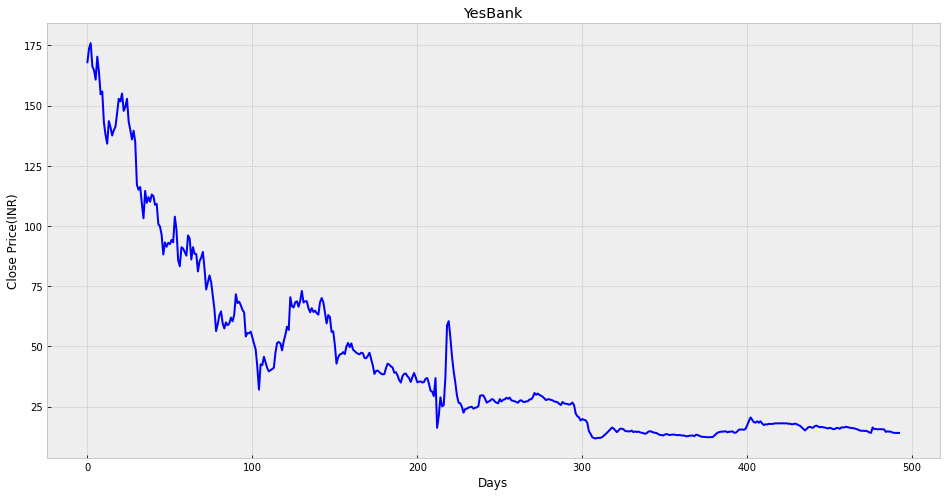

In [9]:
plt.figure(figsize=(16,8))
plt.title('YesBank')
plt.xlabel('Days')
plt.ylabel('Close Price(INR)')
plt.plot(df[['Close Price']],color='blue')

In [10]:
# Get The close Price
df=df[['Close Price']]
df

,Close Price
0,168.00
1,173.75
2,175.90
3,166.25
4,164.75
...,...
488,14.20
489,14.05
490,14.05
491,14.00


In [13]:
# Create a variable topredict 'x' days out into the future
future_days= 25
#create a new column(target data) shifted 'x' units/day up
df['Prediction']= df[['Close Price']].shift(-future_days)
df.tail(4)

<ipython-input-13-e9ffc8e7ef93>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction']= df[['Close Price']].shift(-future_days)


,Close Price,Prediction
489,14.05,NaN
490,14.05,NaN
491,14.00,NaN
492,14.05,NaN


In [14]:
# Create the feature data set(X) and convert it to anumpy array and remove the last 'x'rows/days
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[168.  ]
 [173.75]
 [175.9 ]
 [166.25]
 [164.75]
 [160.75]
 [170.3 ]
 [163.85]
 [154.7 ]
 [155.85]
 [142.95]
 [137.75]
 [134.15]
 [143.55]
 [141.  ]
 [137.55]
 [139.75]
 [141.2 ]
 [146.8 ]
 [152.8 ]
 [151.7 ]
 [155.  ]
 [147.8 ]
 [149.45]
 [152.8 ]
 [143.4 ]
 [139.9 ]
 [135.9 ]
 [139.55]
 [134.75]
 [117.1 ]
 [115.05]
 [116.15]
 [109.3 ]
 [103.2 ]
 [114.55]
 [109.6 ]
 [111.95]
 [110.05]
 [113.05]
 [112.4 ]
 [108.75]
 [109.15]
 [100.8 ]
 [ 99.75]
 [ 96.25]
 [ 88.15]
 [ 93.15]
 [ 91.35]
 [ 93.  ]
 [ 92.45]
 [ 94.2 ]
 [ 93.2 ]
 [103.85]
 [ 98.4 ]
 [ 85.8 ]
 [ 83.25]
 [ 91.15]
 [ 90.65]
 [ 89.15]
 [ 87.65]
 [ 96.05]
 [ 94.75]
 [ 86.05]
 [ 91.2 ]
 [ 88.4 ]
 [ 88.3 ]
 [ 81.1 ]
 [ 85.35]
 [ 86.85]
 [ 89.2 ]
 [ 82.15]
 [ 73.6 ]
 [ 76.55]
 [ 79.45]
 [ 76.65]
 [ 71.2 ]
 [ 65.4 ]
 [ 56.3 ]
 [ 59.25]
 [ 62.9 ]
 [ 64.5 ]
 [ 59.5 ]
 [ 57.4 ]
 [ 59.95]
 [ 58.75]
 [ 59.45]
 [ 61.95]
 [ 60.4 ]
 [ 63.1 ]
 [ 71.6 ]
 [ 67.95]
 [ 68.55]
 [ 67.05]
 [ 65.1 ]
 [ 64.1 ]
 [ 54.1 ]
 [ 55.5 ]
 [ 55.45]
 [ 56.05]


In [15]:
# Create a target dataset(Y) and convert to a numpy array and get all of the target values except the last 'x'rows/days
y=np.array(df['Prediction'])[:-future_days]
print(y)

[143.4  139.9  135.9  139.55 134.75 117.1  115.05 116.15 109.3  103.2
 114.55 109.6  111.95 110.05 113.05 112.4  108.75 109.15 100.8   99.75
  96.25  88.15  93.15  91.35  93.    92.45  94.2   93.2  103.85  98.4
  85.8   83.25  91.15  90.65  89.15  87.65  96.05  94.75  86.05  91.2
  88.4   88.3   81.1   85.35  86.85  89.2   82.15  73.6   76.55  79.45
  76.65  71.2   65.4   56.3   59.25  62.9   64.5   59.5   57.4   59.95
  58.75  59.45  61.95  60.4   63.1   71.6   67.95  68.55  67.05  65.1
  64.1   54.1   55.5   55.45  56.05  53.7   51.05  48.75  41.4   32.
  42.5   42.15  45.65  43.25  40.95  39.6   40.1   40.6   41.05  47.4
  51.4   51.8   51.2   48.3   52.15  54.75  58.15  56.8   70.4   66.6
  66.15  68.3   68.7   66.45  68.95  73.    68.2   68.75  68.7   65.85
  64.15  65.85  64.25  64.8   63.75  63.15  68.25  70.05  68.3   64.05
  59.5   63.    62.1   56.    56.25  50.55  42.8   45.35  46.65  46.8
  47.6   46.75  49.9   51.4   49.65  51.2   48.65  48.    47.35  46.95
  46.65  47.35 

In [17]:
#Lets Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.25)

In [36]:
# create the models
# Create the decision Tree regresor model
tree=DecisionTreeRegressor().fit(x_train,y_train)

#Create the linear Regression Model
lr=LinearRegression().fit(x_train,y_train)

In [19]:
# Get the last 'x' rows of the feature dataset
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[16.65],
       [16.4 ],
       [16.5 ],
       [16.4 ],
       [16.25],
       [16.05],
       [15.9 ],
       [16.15],
       [15.95],
       [15.6 ],
       [15.6 ],
       [16.1 ],
       [16.1 ],
       [15.75],
       [16.3 ],
       [16.3 ],
       [16.35],
       [16.6 ],
       [16.35],
       [16.25],
       [16.05],
       [16.05],
       [15.9 ],
       [15.65],
       [15.45]])

In [20]:
# Show the Model Tree Prediction
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[15.1   16.25  14.95  16.25  16.05  14.425 14.125 25.1   16.3   15.65
 15.65  15.55  15.55  15.86  15.5   15.5   15.425 14.7   15.425 16.05
 14.425 14.425 14.125 14.    18.025]

[17.8770526  17.70236732 17.77224143 17.70236732 17.59755614 17.45780791
 17.35299674 17.52768203 17.3879338  17.1433744  17.1433744  17.49274497
 17.49274497 17.24818557 17.6324932  17.6324932  17.66743026 17.84211555
 17.66743026 17.59755614 17.45780791 17.45780791 17.35299674 17.17831145
 17.03856322]


<ipython-input-31-be8c803da1ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


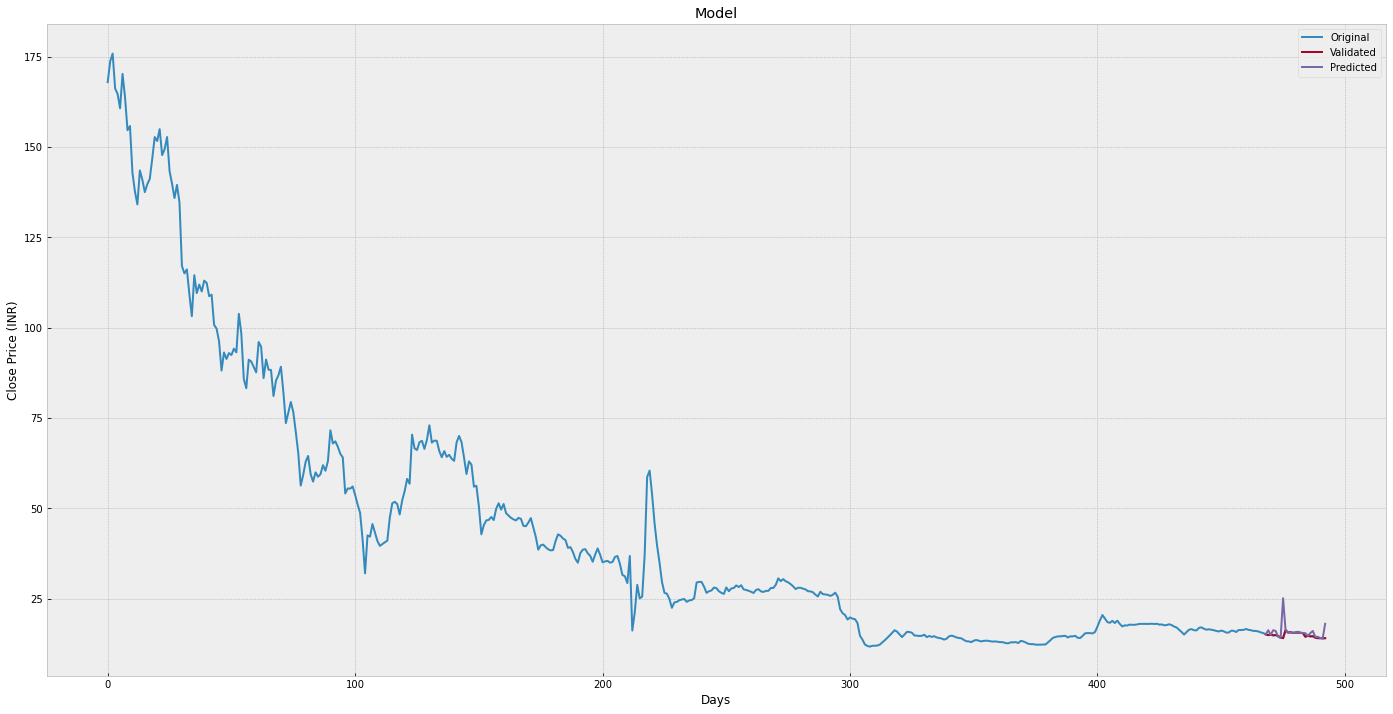

In [31]:
# Let's Visulaize The data
predictions=tree_prediction

valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(24,12))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price (INR)')
plt.plot(df['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Original', 'Validated', 'Predicted'])
plt.show()

<ipython-input-32-6640d45e7964>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


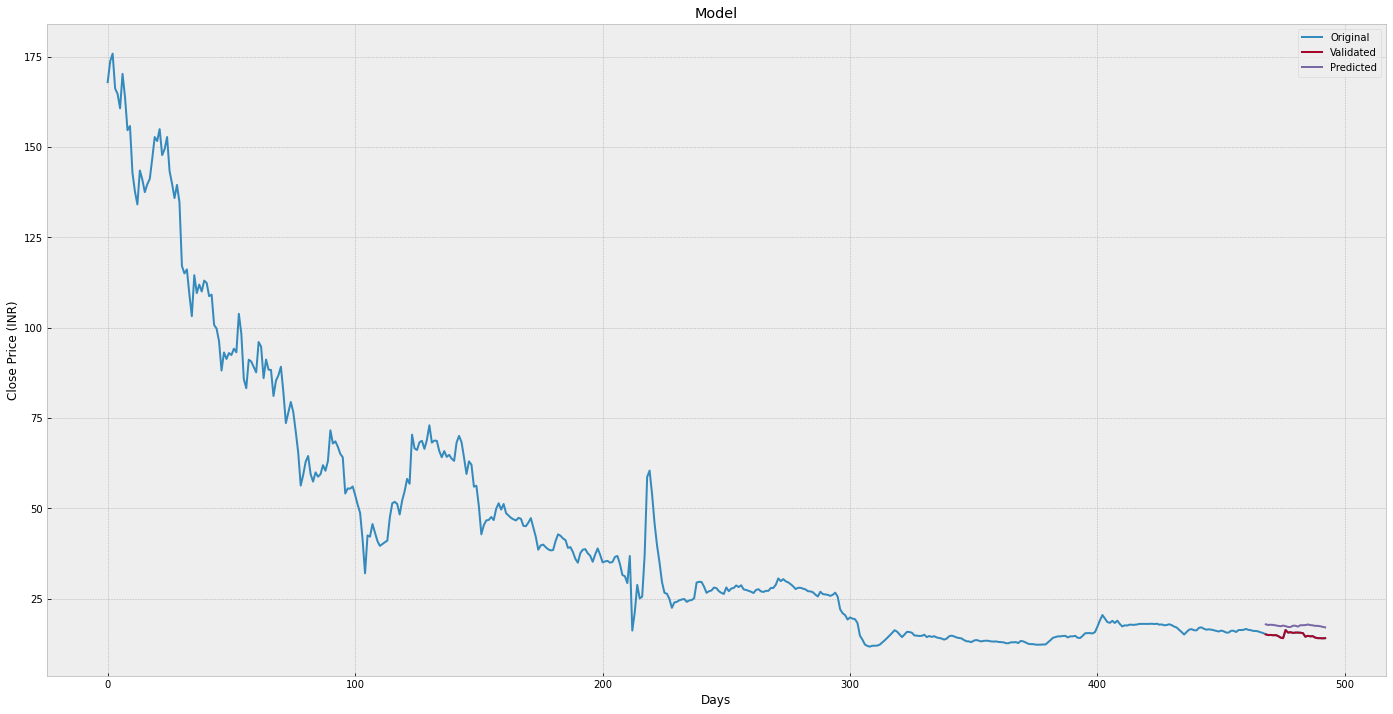

In [32]:
# Let's Visulaize The data
predictions=lr_prediction

valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(24,12))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price (INR)')
plt.plot(df['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Original', 'Validated', 'Predicted'])
plt.show()

In [ ]:
# finally Tree prediction is better than linear prediction 

In [ ]:
# Thanku for watching.